In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Let's play around with Gradient Descent!

In [739]:
#We'll make an N*N grid with values ranging from -L to L
N = 100
L = 100
xs = np.linspace(-L,L,N)
ys = np.linspace(-L,L,N)
grid = np.zeros((N,N))

In [811]:
#Here are two default functions. The  first is a simple parabolic function. The second is made by summing
#Gaussians centered at random points.
def square(x,y):
    return x*x+y*y

centers = np.random.uniform(-L,L,size=(20,2))
level = np.random.uniform(-1,1,size=20)

def crazy(x,y):
    z = 0
    d = [np.exp(-1*((x - center[0])**2 + (y - center[1])**2)/2000) for center in centers]
    return 10 - np.sum(d)


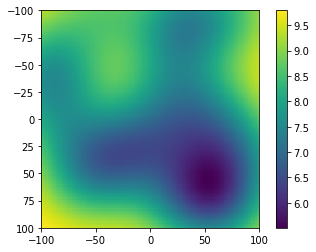

In [812]:
#Here's what our random function looks like! (Note the weird flip on the y-axis)
for i in range(N):
    for j in range(N):
        grid[j,i] = crazy(xs[i],ys[j])
        
plt.imshow(grid,extent=[-L,L,L,-L])
plt.colorbar()

In [800]:
#We define a function which computes approximate gradients
def gradient(f,x,y):
    h = 0.00001
    grad_x = (f(x+h,y) - f(x,y))/h
    grad_y = (f(x,y+h) - f(x,y))/h
    #print (grad_x,grad_y)
    return (grad_x,grad_y)

In [803]:
#Next, we define a function which uses gradients to take steps
def step(x,y,f,eta):
    grad_x, grad_y = gradient(f,x,y)
    return x-eta*grad_x, y-eta*grad_y

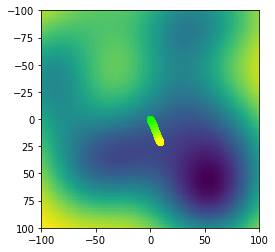

In [815]:
#Finally, let's plot the trajectory of our gradient descent from a fixed point.
x,y = (0,0)
M = 10000
eta = 0.1
plt.imshow(grid,extent=[-L,L,L,-L])
for i in range(M):
    x,y = step(x,y,crazy,eta)
    plt.scatter(x,y,c=(i/M,1,0,1))

In [ ]:
#That was a little disappointing...can we do better?

In [ ]:
#Challenge: Implement Momentum, RMSProp, and Adam Optimizers and use them to perform gradient descent on both the 
#square function and the ``crazy" one. Compare your results!